In [1]:
import sarddpm_train
from matplotlib import pyplot as plt
import torch
import guideddiffusion.gaussian_diffusion as gd
import guideddiffusion.script_util as su
import numpy as np

In [2]:
g = sarddpm_train.load_sar_data("../DSIFN/train/","../DSIFN/train/", 4, 256, 256, False)




In [3]:
def rgb_noise(x_start):
    return torch.randn_like(x_start)


In [4]:
batch = next(g)

In [5]:
imSR = batch[1]["SR"][2].transpose(0,2)
imCR = batch[1]["HR"][2].transpose(0,2)

In [6]:
m, M = torch.min(imCR), torch.max(imCR)

In [6]:
print(m,M)

tensor(-0.8275) tensor(0.9059)


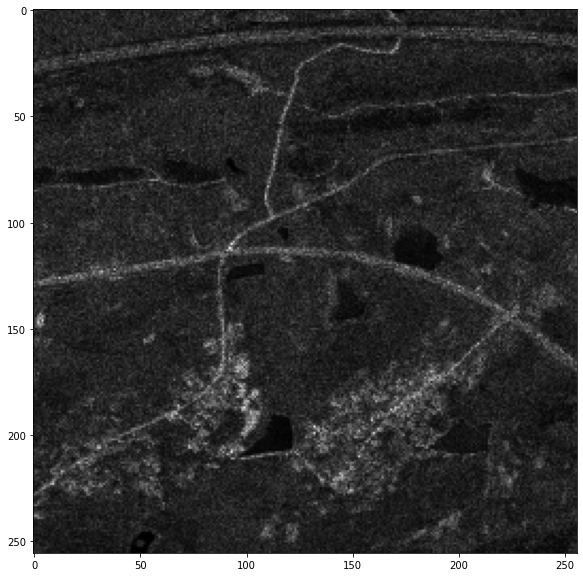

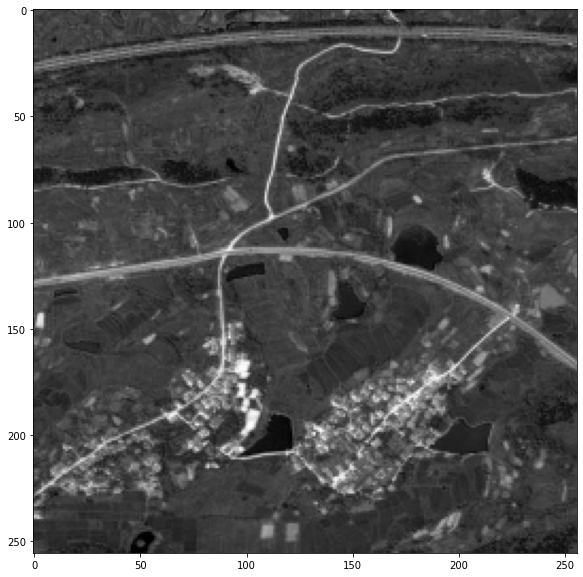

In [9]:
plt.figure(figsize = (10,10))
plt.imshow((imSR - torch.min(imSR))/(torch.max(imSR)-torch.min(imSR)) )
plt.show()
plt.figure(figsize = (10,10))
plt.imshow((imCR - torch.min(imCR))/(torch.max(imCR)-torch.min(imCR)) )


In [8]:
myGD = su.create_gaussian_diffusion()

in gauss diff cre
spaced init


In [9]:
device = torch.device("cpu")

In [20]:
diffused = myGD.q_sample(imCR, torch.tensor(999).to(device))

q_sample
torch.Size([256, 256, 1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


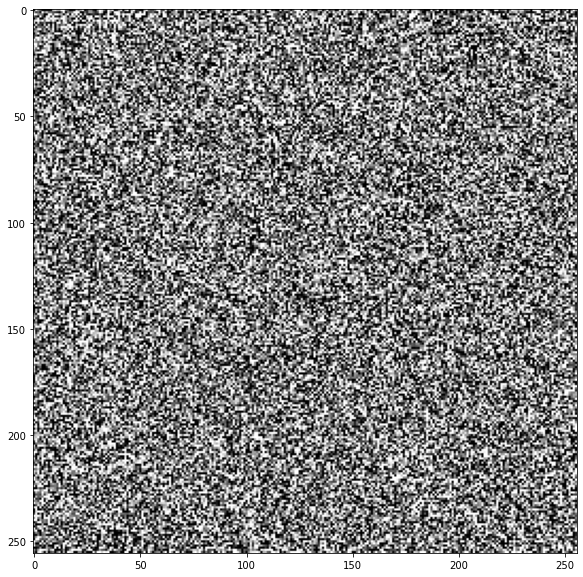

In [21]:
plt.figure(figsize = (10,10))
plt.imshow((diffused-m)/(M-m))

In [22]:
diffNp = diffused[:,:,0].ravel().numpy()

''

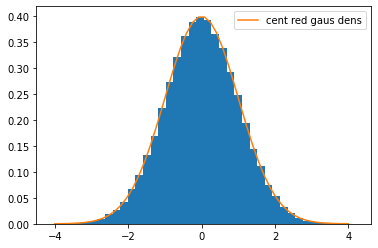

In [34]:
plt.hist(diffNp,bins =  40, density = True)
x = np.linspace(-4,4, 50)
plt.plot(x,1/(2*np.pi)**.5*np.exp(-x**2/2), label="cent red gaus dens")
plt.legend()
""

In [35]:
seed = np.random.RandomState(112311)

''

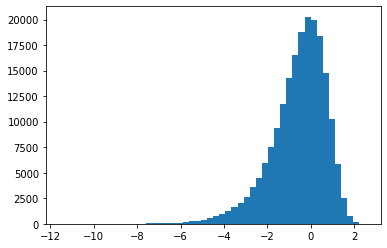

In [36]:
plt.hist(np.log(seed.gamma(1,1,diffused.shape).ravel()), bins = 50)
""


In [66]:
a = torch.randn((5,5))

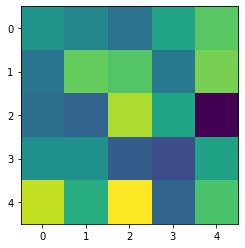

In [67]:
plt.imshow(a)

In [68]:
a = a.repeat([3,1,1])

In [69]:
a.shape

torch.Size([3, 5, 5])

In [64]:
b = torch.tensor(a.shape)
